In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tarfile
from tqdm import tqdm, tqdm_notebook, tnrange
import json
import time

In [2]:
zf = tarfile.open('yelp_dataset.tar') 
zf.extract('yelp_academic_dataset_review.json')
zf.extract('yelp_academic_dataset_business.json')
zf.extract('yelp_academic_dataset_user.json')

KeyError: "filename 'review.json' not found"

In [4]:
# zf.extractall()

In [5]:
line_count = len(open("yelp_academic_dataset_review.json", encoding='utf-8').readlines())
user_ids, business_ids, stars, dates, texts, useful_votes = [], [], [], [], [], []
with open("yelp_academic_dataset_review.json", encoding='utf-8') as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        texts += [blob["text"]]
        useful_votes += [blob['useful']]
ratings_ = pd.DataFrame(
    {"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, "text": texts, 'useful_votes':useful_votes}
)
user_counts = ratings_["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()
ratings_ = ratings_.loc[ratings_.user_id.isin(active_users)]

100%|█████████████████████████████████████████████████████████████████████| 6990280/6990280 [01:21<00:00, 85664.35it/s]


In [24]:
line_count = len(open("yelp_academic_dataset_business.json", encoding='utf-8').readlines())
business_ids, names, addresses, cities, states, latitudes, longitudes, stars, \
        review_counts, is_open, categories = [], [], [], [], [], [], [], [], [], [], []
with open("yelp_academic_dataset_business.json", encoding='utf-8') as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        names += [blob["name"]]
        addresses += [blob["address"]]
        cities += [blob["city"]]
        states += [blob["state"]]
        latitudes += [blob["latitude"]]
        longitudes += [blob["longitude"]]
        stars += [blob["stars"]]
        review_counts += [blob["review_count"]]
        is_open += [blob["is_open"]]
        categories += [blob["categories"]]
        
business_ = pd.DataFrame(
    {"business_id": business_ids, 
     "business_name": names,
     "business_address": addresses,
     "business_city": cities, 
     "business_state": states, 
     "business_latitude": latitudes, 
     "business_longitude": longitudes, 
     "stars": stars, 
     "review_counts": review_counts, 
     "is_open": is_open,
     "categories": categories}
)

100%|███████████████████████████████████████████████████████████████████████| 150346/150346 [00:04<00:00, 31893.31it/s]


In [119]:
line_count = len(open("yelp_academic_dataset_user.json", encoding='utf-8').readlines())
users, names, review_counts, since, friends, useful, \
            funny, cool, n_fans, years_elite, average_stars = [], [], [], [], [], [], [], [], [], [], []
with open("yelp_academic_dataset_user.json", encoding='utf-8') as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users += [blob["user_id"]]
        names += [blob["name"]]
        review_counts += [blob["review_count"]]
        since += [blob["yelping_since"]]
        friends += [blob["friends"]]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        n_fans += [blob["fans"]]
        years_elite += [blob["elite"]]
        average_stars += [blob["average_stars"]]
        
users_ = pd.DataFrame(
    {"user_id": users, 
     "user_name": names,
     "user_review_count": review_counts,
     "user_yelp_since": since,
     "friends": friends,
     "useful_reviews": useful,
     "funny_reviews": funny,
     "cool_reviews": cool,
     "n_fans": n_fans,
     "years_elite": years_elite,
     "average_stars": average_stars
    }
)

100%|█████████████████████████████████████████████████████████████████████| 1987897/1987897 [01:44<00:00, 19075.19it/s]


In [10]:
ratings = ratings_.copy()

In [25]:
business = business_.copy()

In [120]:
users = users_.copy()

In [11]:
ratings.head()

,user_id,business_id,rating,date,text
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is..."
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo..."
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...


C:\Users\Om Mali\AppData\Local\Temp\ipykernel_21068\4223137766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


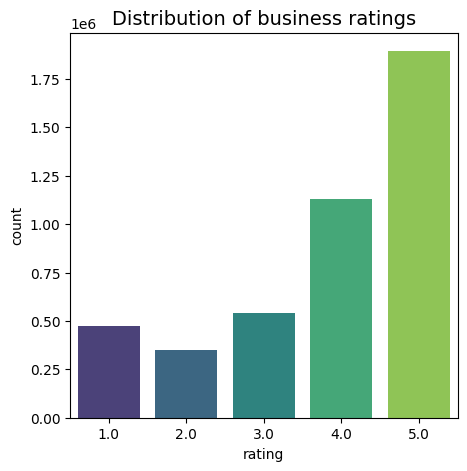

Mean global rating: 3.83.
Mean rating per user: 3.8.


In [67]:
business_notna = business.iloc[np.where((business['categories'].notna()) & business['is_open']==1)]

In [78]:
matches = ['[r|R]estaurant', '[f|F]ood']

matches_regex = "|".join(matches)

matches_bools = business_notna.categories.str.contains(matches_regex, regex=True)

restaurants = business_notna[matches_bools]

In [79]:
restaurants.shape

(44594, 11)

In [80]:
restaurants.head()

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,stars,review_counts,is_open,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,36.208102,-86.768170,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,27.955269,-82.456320,4.0,10,1,"Vietnamese, Food, Restaurants, Food Trucks"


In [121]:
restaurants.to_csv('restaurants.csv', index=False)

In [104]:
new_ratings = pd.merge(ratings, restaurants, on="business_id", how='inner')

In [115]:
ratings.columns

Index(['user_id', 'business_id', 'rating', 'date', 'text'], dtype='object')

In [114]:
restaurants.columns[1:]

Index(['business_name', 'business_address', 'business_city', 'business_state',
       'business_latitude', 'business_longitude', 'stars', 'review_counts',
       'is_open', 'categories'],
      dtype='object')

In [116]:
new_ratings.drop(restaurants.columns[1:], axis=1, inplace=True)

In [118]:
new_ratings.shape

(2674005, 5)

In [140]:
new_ratings.to_csv('ratings.csv', index=False)

In [131]:
new_ratings.head()

,user_id,business_id,rating,date,text
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is..."
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo..."
3,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,2016-07-25 07:31:06,Had a party of 6 here for hibachi. Our waitres...
4,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4.0,2011-10-27 17:12:05,The bun makes the Sonoran Dog. It's like a snu...


In [132]:
new_user_ids = list(new_ratings['user_id'].unique())

In [135]:
# new_users = pd.merge(users, new_ratings, on="user_id", how='inner')
new_users = users[users['user_id'].isin(new_user_ids)]

In [137]:
users.shape

(1987897, 11)

In [142]:
new_users.shape

(281334, 11)

In [143]:
new_users.to_csv('users.csv', index=False)

In [144]:
ratings = pd.read_csv('ratings.csv')
restau = pd.read_csv('restaurants.csv')
users = pd.read_csv('users.csv')

In [178]:
ratings['date'] = pd.to_datetime(ratings['date'])

# EDA

In [153]:
n_ratings = len(ratings)
n_users = ratings['user_id'].nunique()
n_restau = ratings['business_id'].nunique()
print('Number of users: ', n_users)
print('Number of restaurants: ', n_business)
print('Avg number of ratings per user: ', round(n_ratings/n_users,2))
print('Avg number of ratings per business: ', round(n_ratings/n_restau,2))

Number of users:  281334
Number of restaurants:  44539
Avg number of ratings per user:  9.5
Avg number of ratings per business:  60.04


C:\Users\Om Mali\AppData\Local\Temp\ipykernel_21068\2971758067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


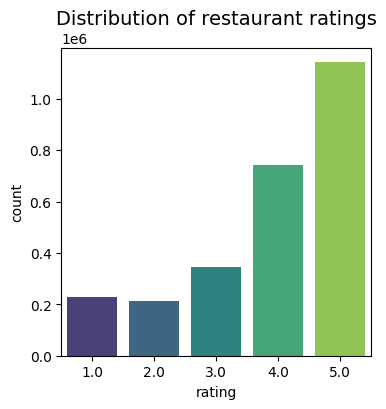

In [154]:
plt.figure(figsize=(4,4))
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of restaurant ratings", fontsize=14)
plt.show();

In [147]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")
mean_ratings = ratings.groupby('user_id')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.88.
Mean rating per user: 3.85.


In [148]:
restau_ratings = ratings.merge(restau, on='business_id')
restau_ratings['business_name'].value_counts()[0:10]

business_name
Starbucks                 13673
McDonald's                10177
Dunkin'                    6491
Chipotle Mexican Grill     6078
First Watch                5954
Chick-fil-A                5892
Taco Bell                  5048
Panera Bread               5001
Buffalo Wild Wings         4433
Acme Oyster House          4405
Name: count, dtype: int64

In [149]:
mean_ratings = ratings.groupby('business_id')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
restau[restau['business_id']==lowest_rated]

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,stars,review_counts,is_open,categories
1421,-7Rx5jVeQmlVoAU_oXrzew,McDonald's,24 W Marlton Pike,Cherry Hill,NJ,39.914764,-75.012779,1.0,11,1,"Burgers, Fast Food, Restaurants, Food, Coffee ..."


In [150]:
highest_rated = mean_ratings['rating'].idxmax()
restau[restau['business_id'] == highest_rated]

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,stars,review_counts,is_open,categories
28370,--rS-rnOIZxoiDA8yctWpQ,Publix GreenWise Market,555 Channelside Dr,Tampa,FL,27.943291,-82.45016,5.0,8,1,"Organic Stores, Food, Grocery, Shopping, Publi..."


In [161]:
restau[restau['business_id'] == highest_rated]['categories'][28370]

'Organic Stores, Food, Grocery, Shopping, Public Markets'

In [151]:
ratings[ratings['business_id']==highest_rated]

,user_id,business_id,rating,date,text
1815431,MaT3XAnPldVe4WFQMyAd0Q,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-09-05 22:01:06,"Recommended by friends, we walked across the s..."
1828888,MRZ0kv1a5MsaC19fCdHo-Q,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-08-19 13:47:41,Grand opening this morning at 7 AM!\nI am so g...
1829791,Bjk0URaYFA8k8F-Cmxltag,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-10-05 17:49:01,What a great shopping experience! This newly o...
1837473,z1MRcX51l2CSLMlhkZOsFg,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-11-13 21:33:11,Publix Greenwise in downtown Tampa is amazing....
1843300,dsX3MiQiTy3OVI8MKn0I4w,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-10-16 16:19:47,File under: things I'm so happy I realized are...
1860999,k5LdONRIZLJpkkJ-xtOXyg,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-08-22 03:39:04,"Tampa's GreenWise Market opened on August 19, ..."
1862051,9Gs82VLVMn-JQSvR9d7ZOg,--rS-rnOIZxoiDA8yctWpQ,5.0,2021-09-21 23:59:09,This Publix Greenwise Market is a unique Publi...


In [180]:
ratings.describe()

,rating,date
count,2.674005e+06,2674005
mean,3.879994e+00,2017-02-09 22:12:23.419049216
min,1.000000e+00,2005-02-16 04:06:26
25%,3.000000e+00,2015-02-19 00:55:15
50%,4.000000e+00,2017-07-15 01:39:48
75%,5.000000e+00,2019-06-29 16:50:54
max,5.000000e+00,2022-01-19 19:48:13
std,1.278433e+00,NaN


In [ ]:
print('Ratings Columns: ', ratings.columns)
print()
print('Restaurant Columns: ', restau.columns)
print()
print('Ratings Columns: ', ratings.columns)

In [ ]:
# ratings['six_month'] = 

In [172]:
# np.where('Restaurants' not in restau.categories)
restau[~restau["categories"].str.contains('Restaurants')]

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,stars,review_counts,is_open,categories
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"
14,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,10303 108 Street NW,Edmonton,AB,53.544682,-113.506589,4.0,12,1,"Arts & Entertainment, Music Venues, Internet S..."
16,5BmQX4UVJY19mMtafMg7JA,Breadland Organic Whole Grain Bakery,"11642 104 Avenue, Unit 642",Edmonton,AB,53.547205,-113.522448,4.0,23,1,"Specialty Food, Bakeries, Food, Health Markets"
17,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,FL,28.010360,-82.430042,3.0,9,1,"Food, Grocery, Convenience Stores"
18,txyXRytGjwOXvS8s4sc-WA,Smoothie King,1070 E Tucson Marketplace Blvd,Tucson,AZ,32.186794,-110.954765,3.0,29,1,"Vitamins & Supplements, Ice Cream & Frozen Yog..."
...,...,...,...,...,...,...,...,...,...,...,...
44581,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,NV,39.534947,-119.765698,4.0,5,1,"Convenience Stores, Food, Automotive, Gas Stat..."
44584,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,MO,38.660185,-90.225247,5.0,8,1,"Caterers, Convenience Stores, Food, Event Plan..."
44586,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,38.641988,-90.261655,4.0,71,1,"Health Markets, Specialty Food, Food, Grocery"
44587,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,39.638245,-86.128069,4.0,29,1,"Food, Coffee & Tea"
